In [1]:
# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import torch

from sbi import analysis as analysis

# sbi
from sbi import utils as utils
from sbi.inference import NPE, simulate_for_sbi
from sbi.utils.user_input_checks import (
    check_sbi_inputs,
    process_prior,
    process_simulator,
)

# remove top and right axis from plots
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from MyHHModel_v4_ModifiedEuler import syn_current, run_HH_model, plot_results, compute_attributes

def simulation_wrapper(params):
    I_inj, dt, t, A = syn_current(duration=100, dt=0.05, t_on=10, t_off=90)
    obs = run_HH_model(params.unsqueeze(0), I=I_inj, t=t, dt=dt, A_soma=A, V0=-65, nois_fact=0)
    return compute_attributes(obs)

In [3]:
import matplotlib.cm as cm

def parameter_study(my_params, param_dim, param_name, base_param, pert_factors, fig_title):

    I_inj, dt, t, A = syn_current(duration=100, dt=0.05, t_on=10, t_off=90)
    params = my_params
    colors = cm.plasma(np.linspace(0, 1, len(pert_factors)))

    fig = plt.figure(figsize=(20, 5))
    gs = mpl.gridspec.GridSpec(1, 4, width_ratios=[4, 2, 2, 2])

    for i in range(len(pert_factors)):
        params[param_dim] = pert_factors[i] * base_param
        obs = run_HH_model(params.unsqueeze(0), I=I_inj, t=t, dt=dt, A_soma=A, V0=-65, nois_fact=0)
        atts = compute_attributes(obs)

        ax = plt.subplot(gs[0])
        plt.plot(obs["t"], obs["V"], color=colors[i], label=str(params[param_dim].item()))
        plt.ylabel("Voltage ($mV$)")
        plt.xlabel("Time ($ms$)")
        plt.title(fig_title)

        ax = plt.subplot(gs[1])
        plt.scatter(params[param_dim], atts[0], color='b')
        plt.xlabel(param_name)
        plt.ylabel("Firing Rate ($ms^{-1}$)")

        ax = plt.subplot(gs[2])
        plt.scatter(params[param_dim], atts[1], color='b')
        plt.xlabel(param_name)
        plt.ylabel("Mean Voltage ($mV$)")

        ax = plt.subplot(gs[3])
        plt.scatter(params[param_dim], atts[2], color='b')
        plt.xlabel(param_name)
        plt.ylabel("ISI Entropy")

    ax = plt.subplot(gs[0])
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1])

    return

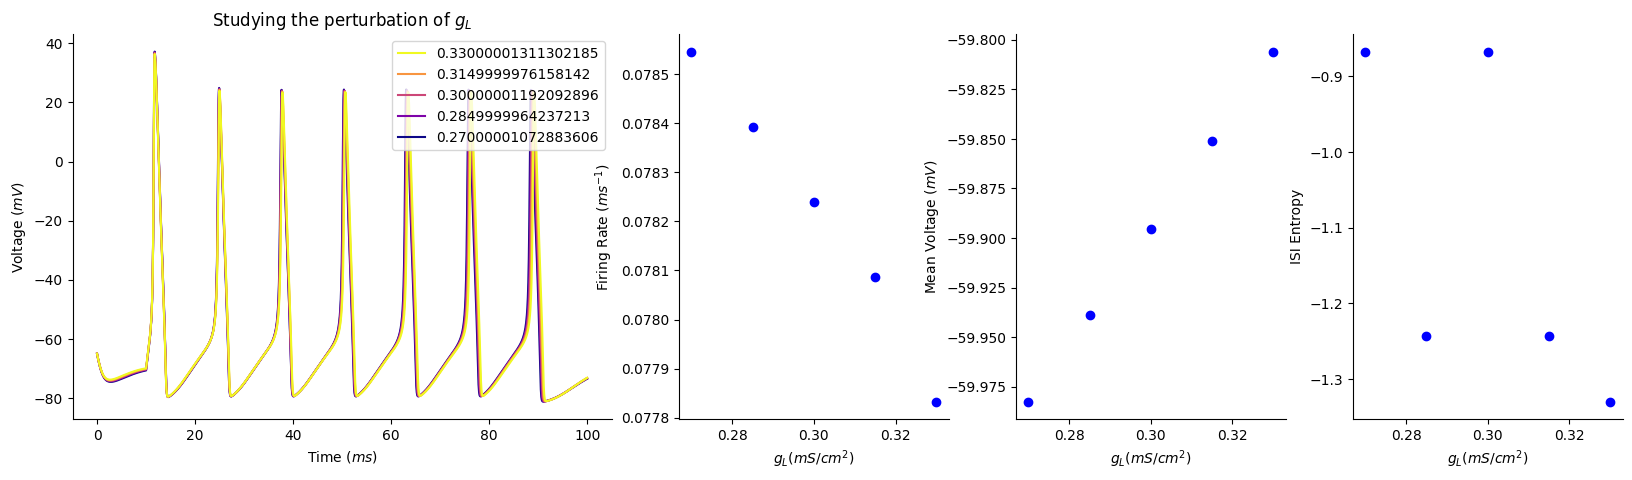

In [4]:
my_gL, my_gNa, my_gK, my_Iapp = 0.3, 120, 36, 15                    # Define center paramters
my_params = torch.tensor([my_gL, my_gNa, my_gK, my_Iapp])
perturbation_factors = np.array([0.9, 0.95, 1, 1.05, 1.1])          # Perturbation factors to be studied

parameter_study(my_params, 0, '$g_L (mS/cm^2)$', my_gL, perturbation_factors, "Studying the perturbation of $g_L$")

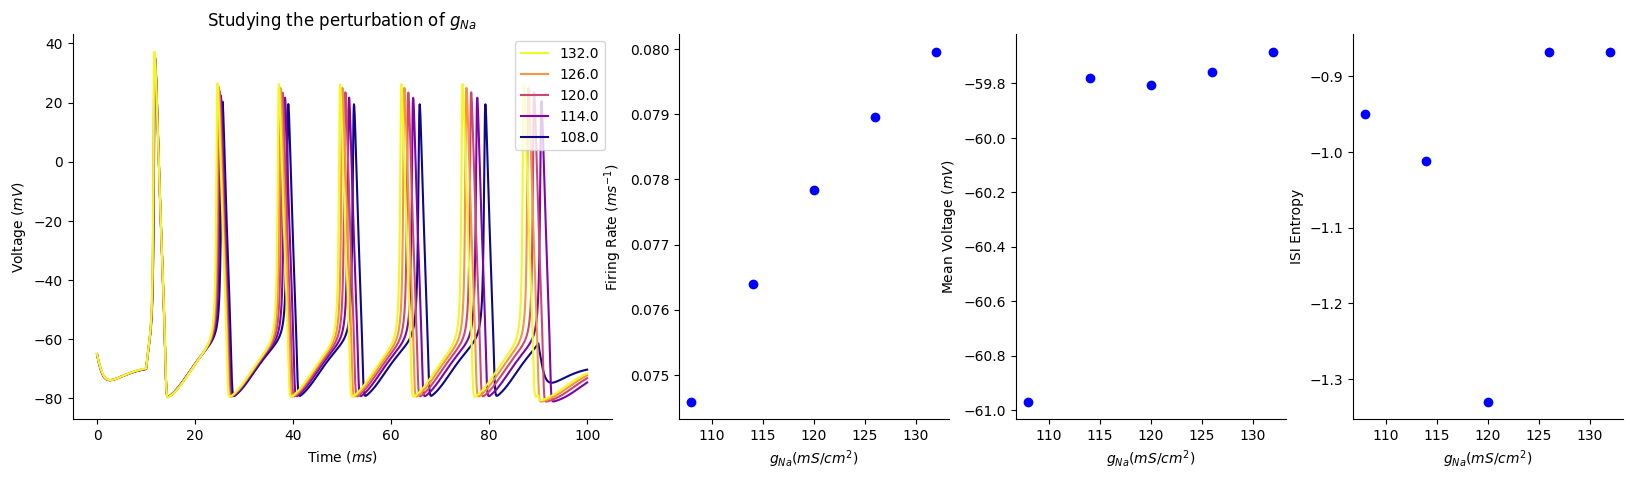

In [5]:
parameter_study(my_params, 1, '$g_{Na} (mS/cm^2)$', my_gNa, perturbation_factors, "Studying the perturbation of $g_{Na}$")

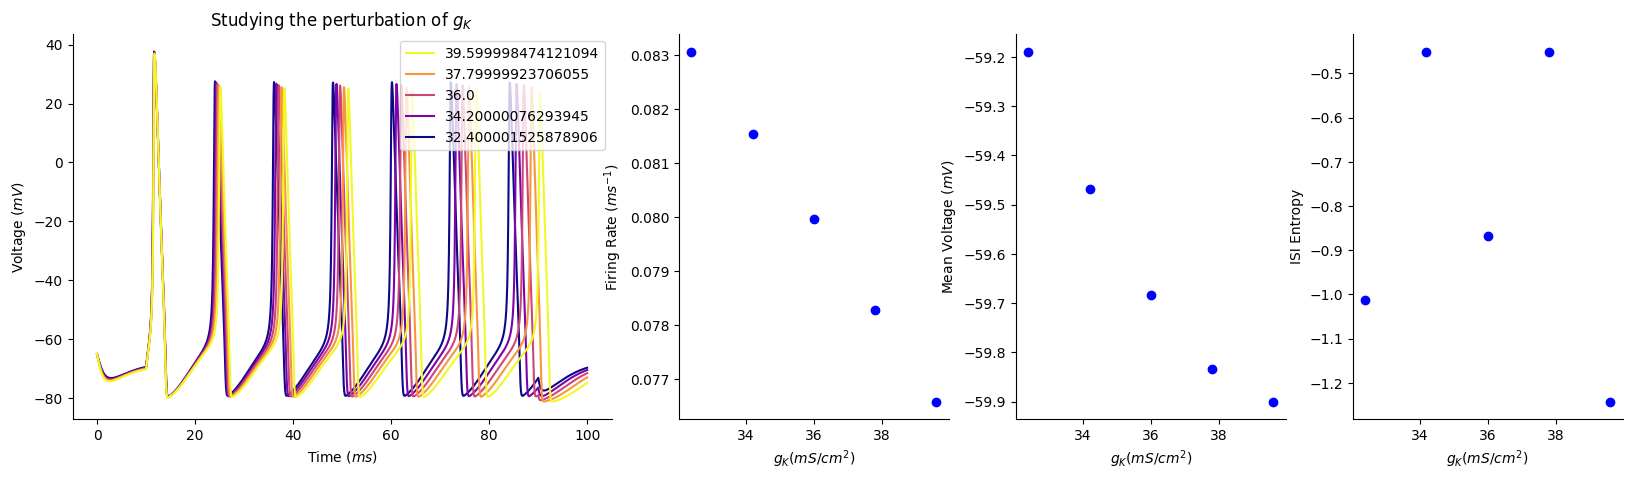

In [6]:
parameter_study(my_params, 2, '$g_K (mS/cm^2)$', my_gK, perturbation_factors, "Studying the perturbation of $g_K$")